In [26]:
import numpy as np
import scipy.signal
from datetime import datetime
from fur.one_data_set_analyzer import analyze_one_dataset
from scipy.optimize import minimize
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
from fur.finding_period import get_period
from fur.fluctuations import get_fluctiation_and_noise_var
import lattice.lattice as lattice
from lattice.summary_in_undulator import get_summary_in_undulator
shift_03_10_2020 = path_assistant.PathAssistant('shift_03_10_2020',      
    ignore_files=["RefCurve_2020-03-10_0_111937_test.Wfm.bin"])
waveforms_dir = shift_03_10_2020.get_waveforms_dir()
results_dir = shift_03_10_2020.get_results_dir()
fluctuations_df = shift_03_10_2020.get_fluctuations_df("res_df_nd_filters_data_plus_acnet_03_10_2020.csv")
lattice_file = shift_03_10_2020.get_6dsim_dir().fi("IOTA_1NL_100MeV_v8.6.1.3.6ds_data.txt")
t1 = datetime(2020, 3, 10, 11, 32, 0)
t2 = datetime(2020, 3, 10, 12, 58, 0)
from config import get_from_config, save_to_config

# Regenerate fluctuations data if needed:

There are 19 files in this data set.
Started working on the file  RefCurve_2020-03-10_10_121356.Wfm.bin (1/19)


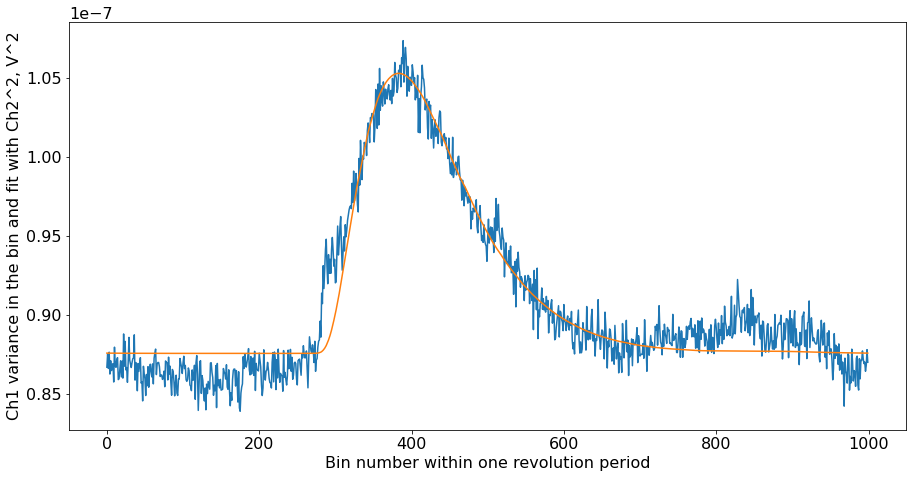

Sum amplitude = 0.33 V
Finished working on  RefCurve_2020-03-10_10_121356.Wfm.bin (1/19)
Started working on the file  RefCurve_2020-03-10_11_121907.Wfm.bin (2/19)


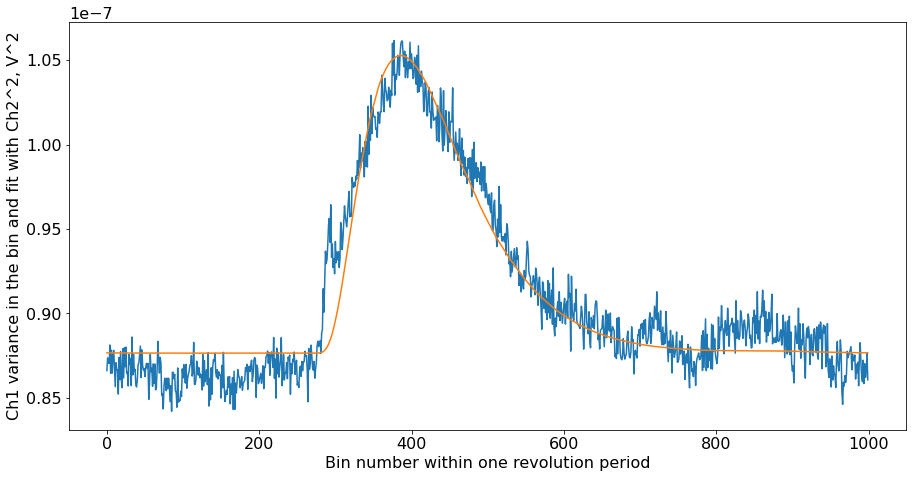

Sum amplitude = 0.331 V
Finished working on  RefCurve_2020-03-10_11_121907.Wfm.bin (2/19)
Started working on the file  RefCurve_2020-03-10_12_122451.Wfm.bin (3/19)


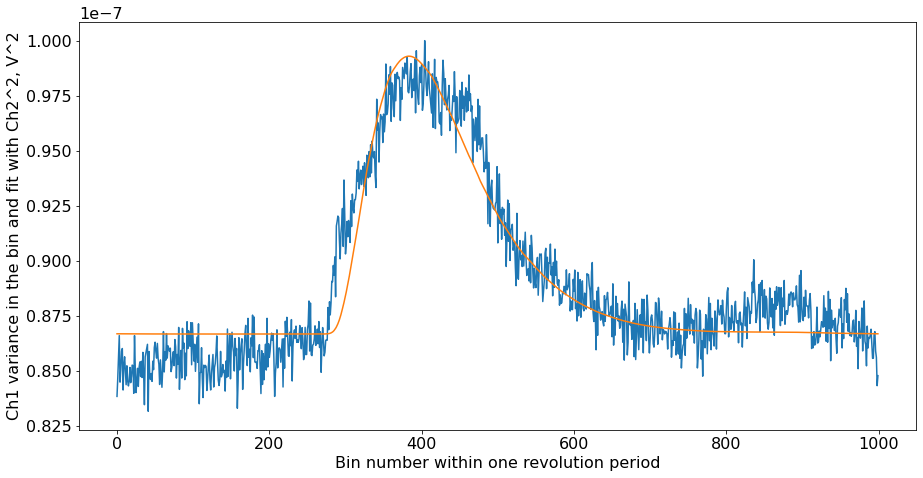

Sum amplitude = 0.276 V
Finished working on  RefCurve_2020-03-10_12_122451.Wfm.bin (3/19)
Started working on the file  RefCurve_2020-03-10_13_123150.Wfm.bin (4/19)


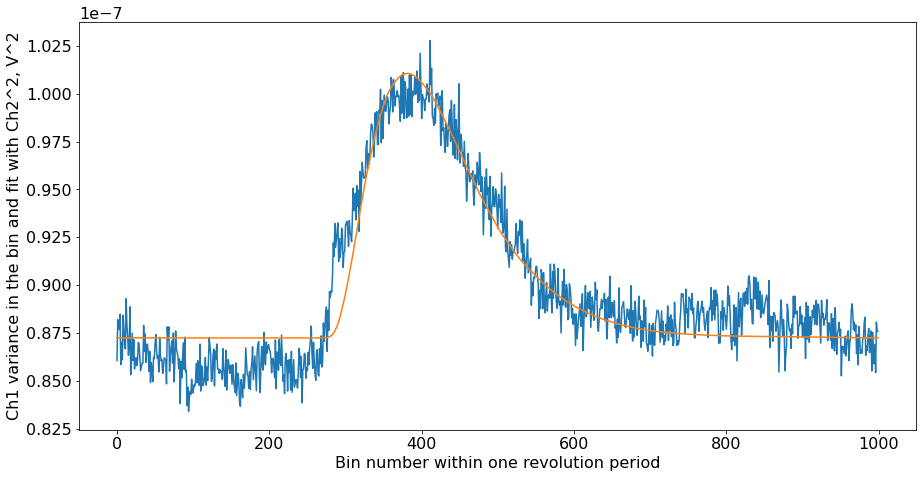

Sum amplitude = 0.277 V
Finished working on  RefCurve_2020-03-10_13_123150.Wfm.bin (4/19)
Started working on the file  RefCurve_2020-03-10_14_123409.Wfm.bin (5/19)


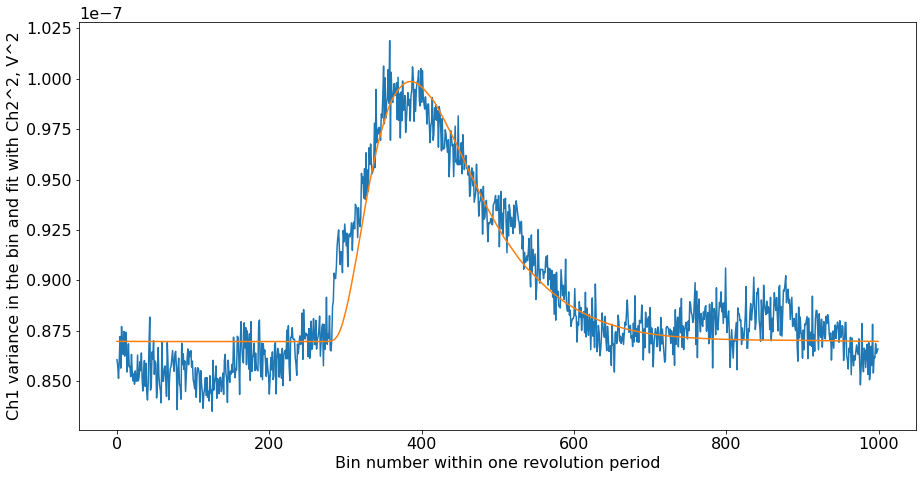

Sum amplitude = 0.277 V
Finished working on  RefCurve_2020-03-10_14_123409.Wfm.bin (5/19)
Started working on the file  RefCurve_2020-03-10_15_123707.Wfm.bin (6/19)


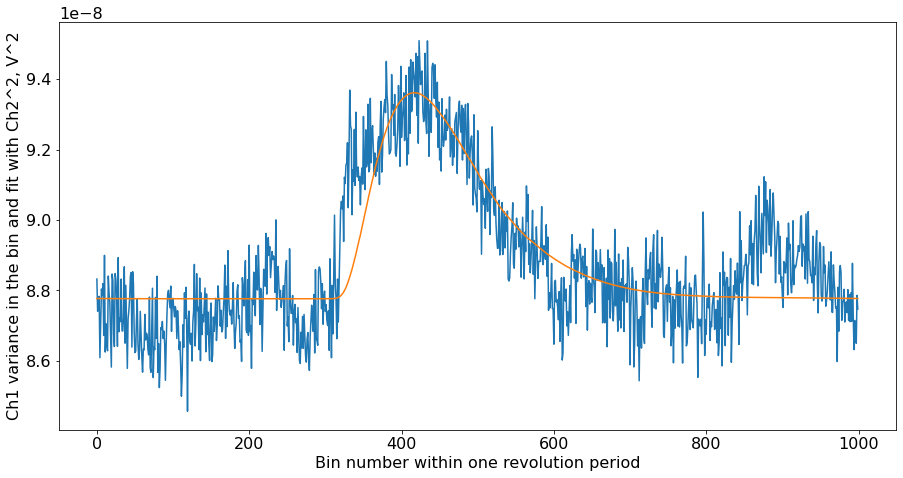

Sum amplitude = 0.156 V
Finished working on  RefCurve_2020-03-10_15_123707.Wfm.bin (6/19)
Started working on the file  RefCurve_2020-03-10_16_124126.Wfm.bin (7/19)


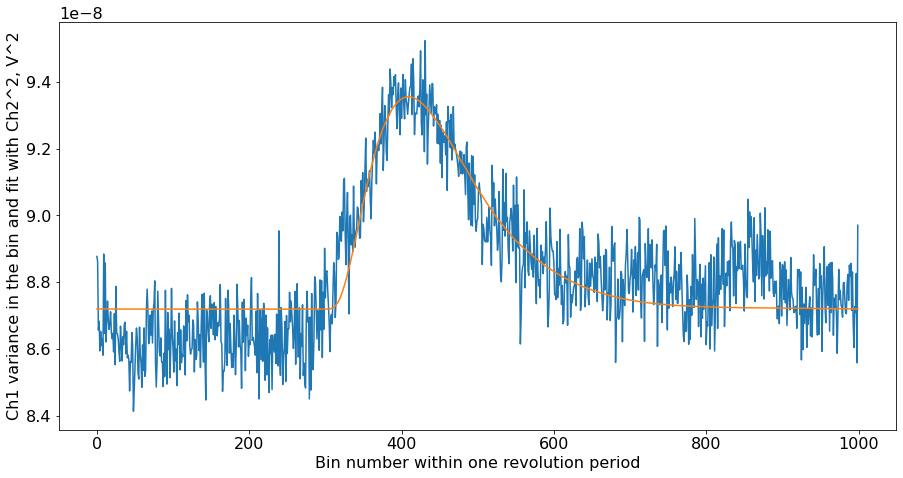

Sum amplitude = 0.156 V
Finished working on  RefCurve_2020-03-10_16_124126.Wfm.bin (7/19)
Started working on the file  RefCurve_2020-03-10_17_124538.Wfm.bin (8/19)


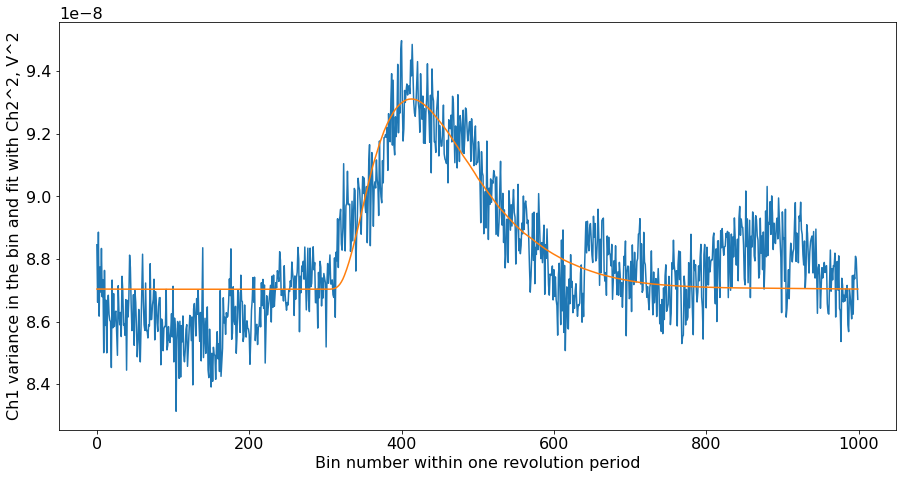

Sum amplitude = 0.156 V
Finished working on  RefCurve_2020-03-10_17_124538.Wfm.bin (8/19)
Started working on the file  RefCurve_2020-03-10_18_125040.Wfm.bin (9/19)


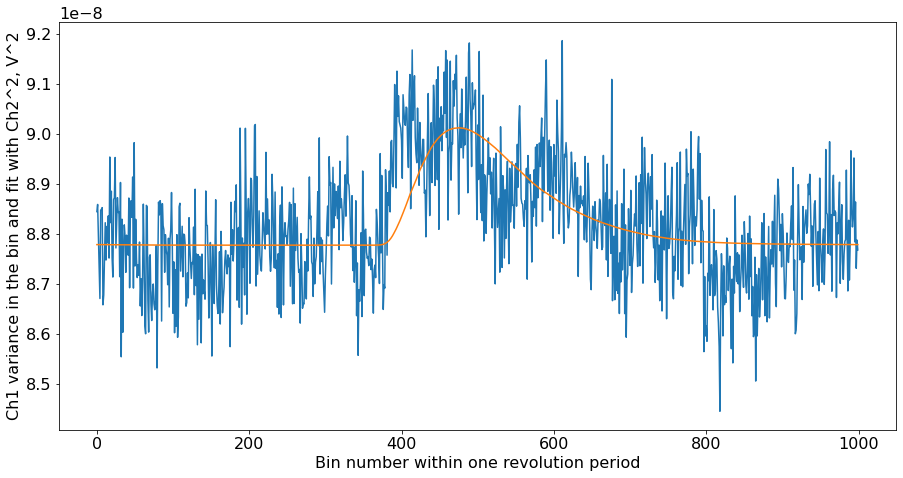

Sum amplitude = 0.0695 V
Finished working on  RefCurve_2020-03-10_18_125040.Wfm.bin (9/19)
Started working on the file  RefCurve_2020-03-10_19_125407.Wfm.bin (10/19)


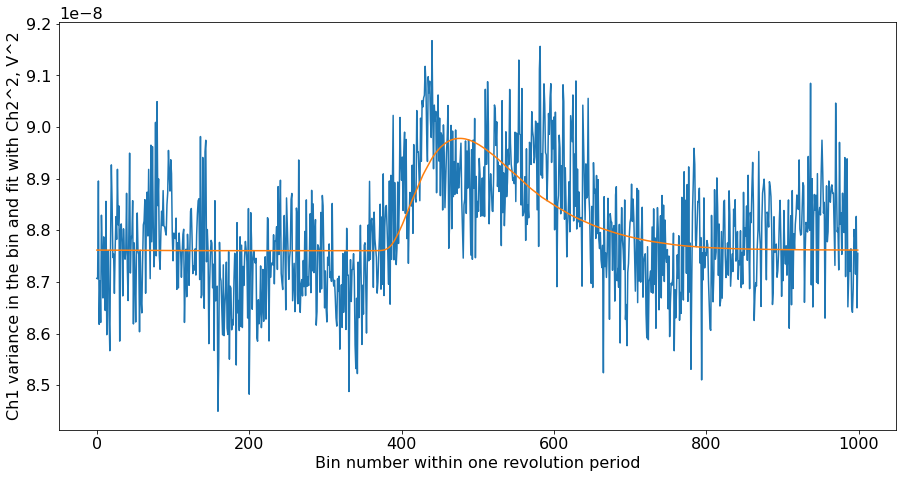

Sum amplitude = 0.0693 V
Finished working on  RefCurve_2020-03-10_19_125407.Wfm.bin (10/19)
Started working on the file  RefCurve_2020-03-10_20_125657.Wfm.bin (11/19)


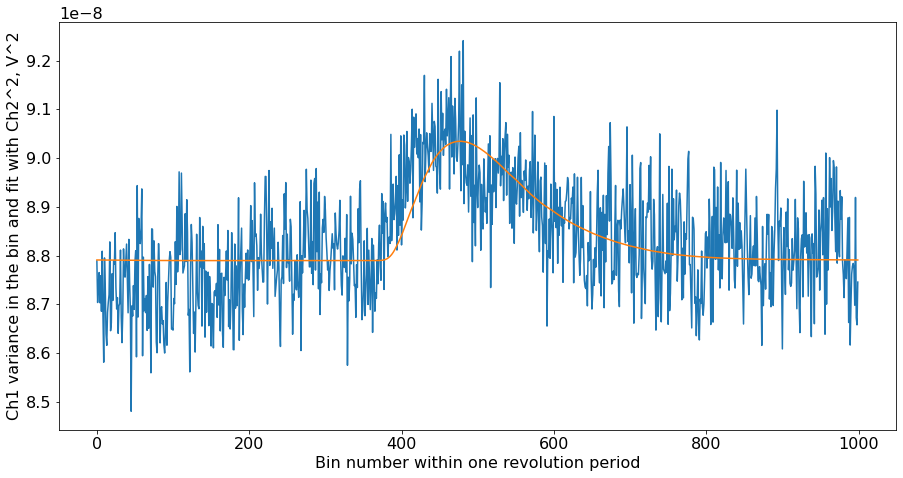

Sum amplitude = 0.0695 V
Finished working on  RefCurve_2020-03-10_20_125657.Wfm.bin (11/19)
Started working on the file  RefCurve_2020-03-10_2_113530.Wfm.bin (12/19)


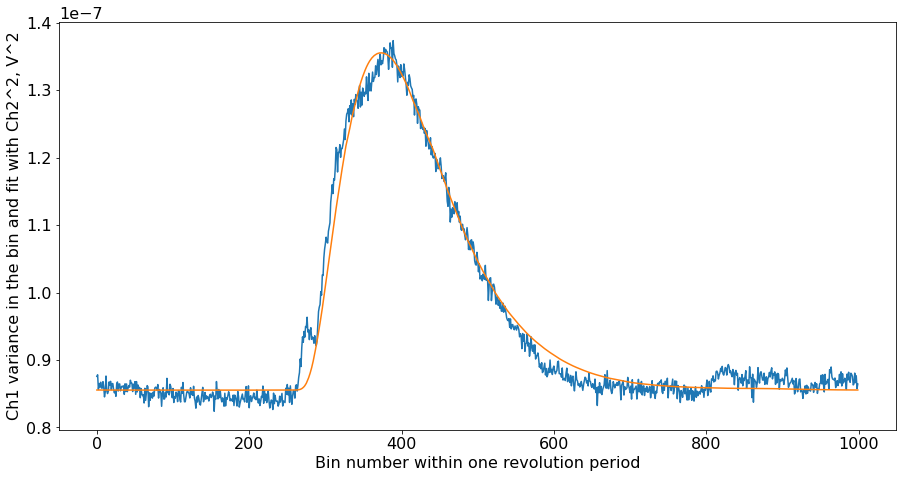

Sum amplitude = 0.604 V
Finished working on  RefCurve_2020-03-10_2_113530.Wfm.bin (12/19)
Started working on the file  RefCurve_2020-03-10_3_113943.Wfm.bin (13/19)


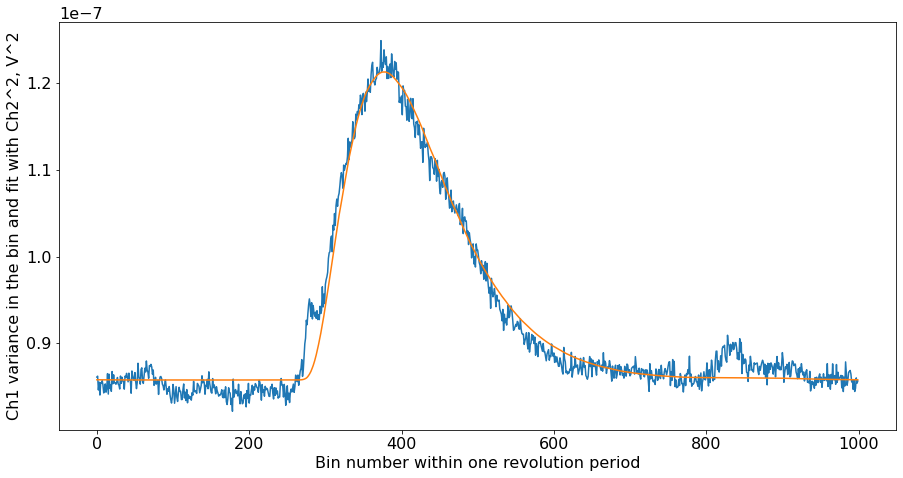

Sum amplitude = 0.505 V
Finished working on  RefCurve_2020-03-10_3_113943.Wfm.bin (13/19)
Started working on the file  RefCurve_2020-03-10_4_114207.Wfm.bin (14/19)


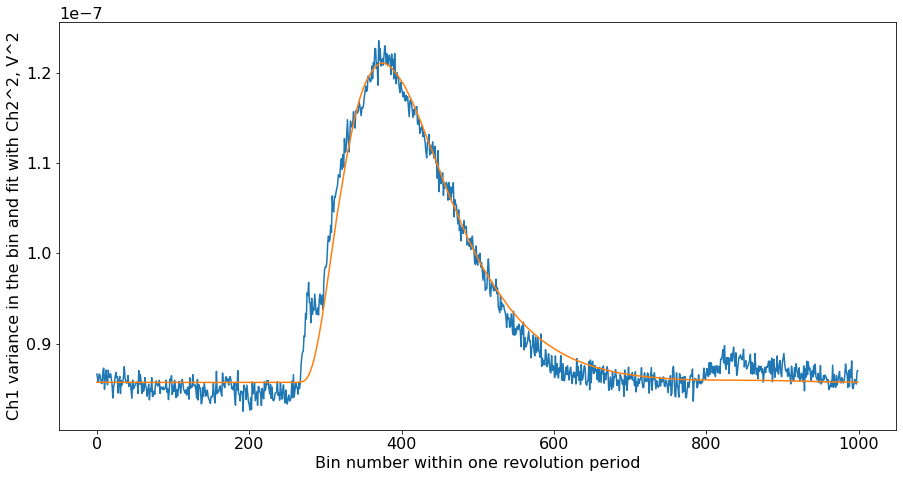

Sum amplitude = 0.505 V
Finished working on  RefCurve_2020-03-10_4_114207.Wfm.bin (14/19)
Started working on the file  RefCurve_2020-03-10_5_114546.Wfm.bin (15/19)


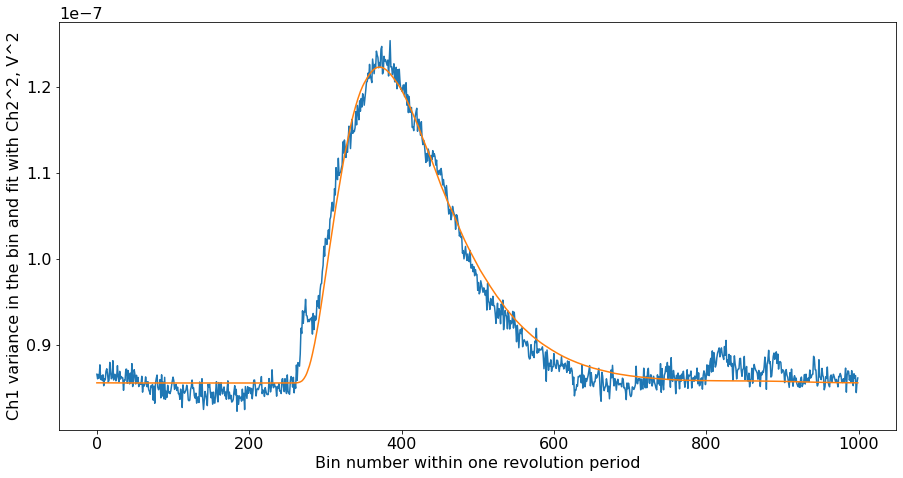

Sum amplitude = 0.505 V
Finished working on  RefCurve_2020-03-10_5_114546.Wfm.bin (15/19)
Started working on the file  RefCurve_2020-03-10_6_114948.Wfm.bin (16/19)


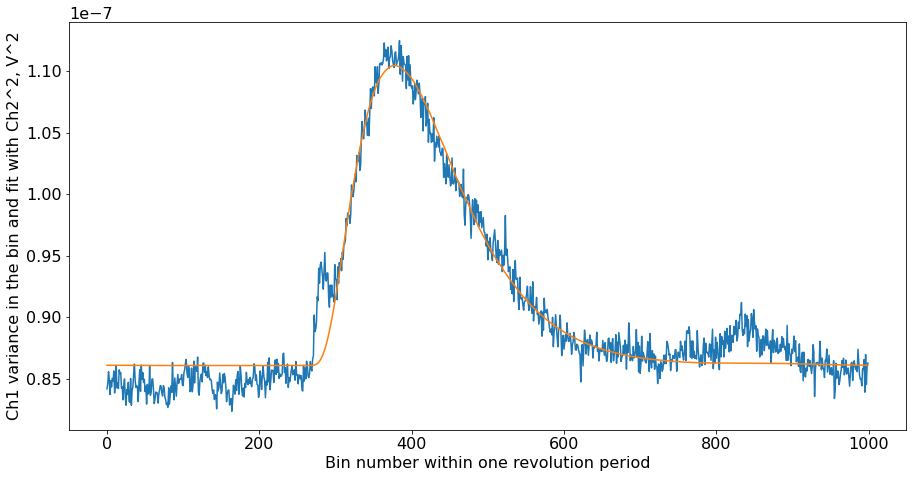

Sum amplitude = 0.4 V
Finished working on  RefCurve_2020-03-10_6_114948.Wfm.bin (16/19)
Started working on the file  RefCurve_2020-03-10_7_115153.Wfm.bin (17/19)


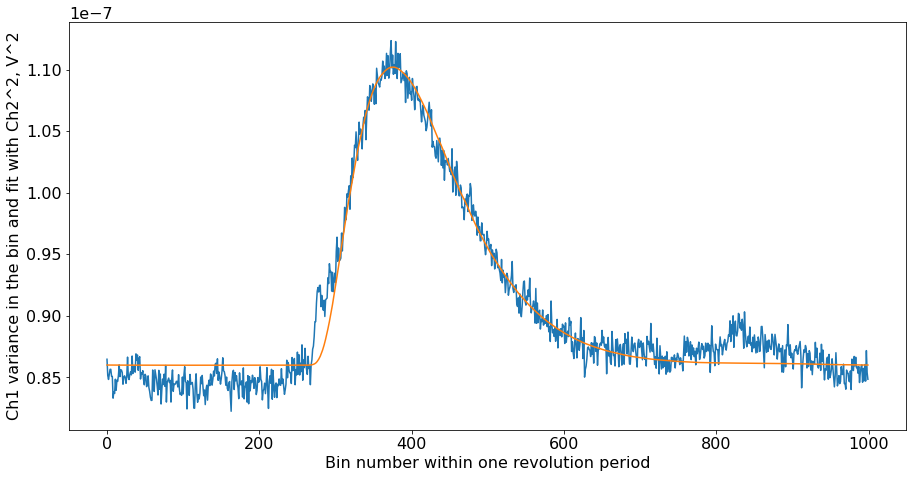

Sum amplitude = 0.4 V
Finished working on  RefCurve_2020-03-10_7_115153.Wfm.bin (17/19)
Started working on the file  RefCurve_2020-03-10_8_115935.Wfm.bin (18/19)


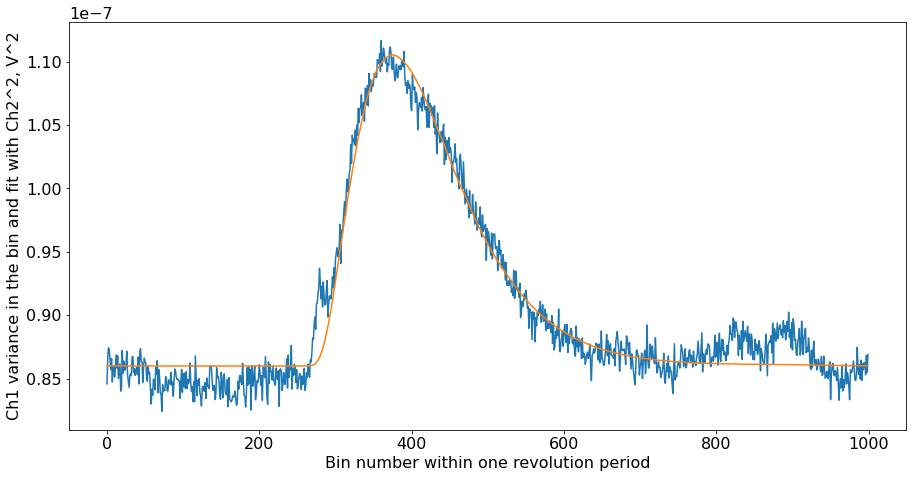

Sum amplitude = 0.4 V
Finished working on  RefCurve_2020-03-10_8_115935.Wfm.bin (18/19)
Started working on the file  RefCurve_2020-03-10_9_120443.Wfm.bin (19/19)


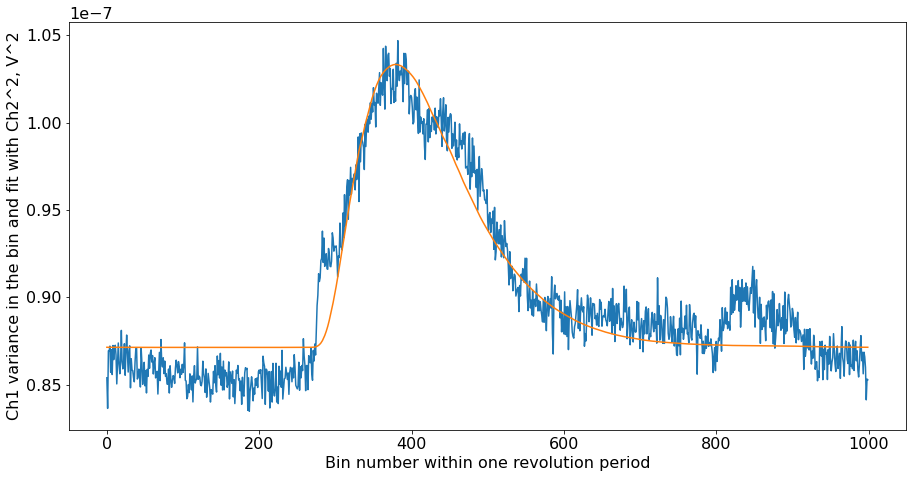

Sum amplitude = 0.332 V
Finished working on  RefCurve_2020-03-10_9_120443.Wfm.bin (19/19)
Results saved to /mnt/c/Users/lobac_000/OneDrive - Fermi National Accelerator Laboratory/FUR/shifts/shift_03_10_2020/results/res_df_nd_filters_data_03_10_2020.csv


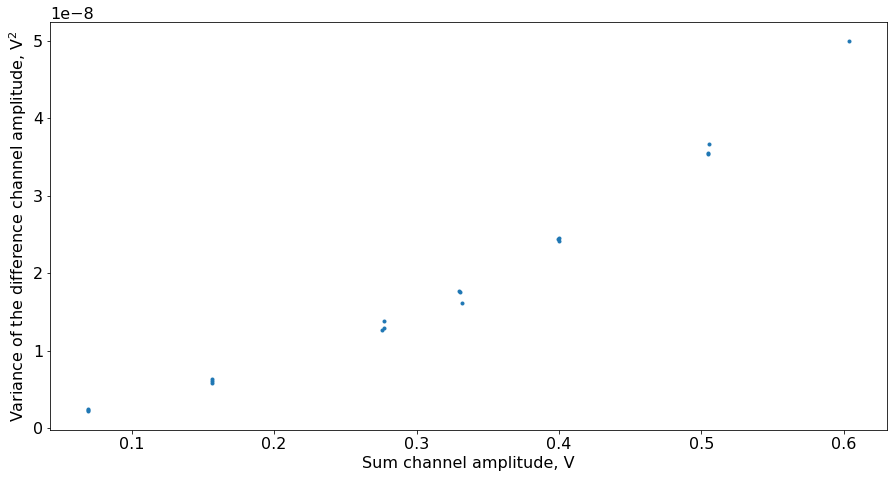

In [2]:
base_name = "nd_filters_data_03_10_2020"
fluctuations_df = analyze_one_dataset(
    shift_03_10_2020,
    base_name,
    t1,
    t2)

# Theoretical prediction

In [27]:
undulator_df, emittance_6D = get_summary_in_undulator(
    lattice_file,
    fluctuations_df.loc[:,lattice.acnet_devices_X].mean().values,
    fluctuations_df.loc[:,lattice.acnet_devices_Y].mean().values
    )
sigma_x, sigma_y = undulator_df.loc["Middle", ["Sigma_um_X", "Sigma_um_Y"]]
sigma_z = fluctuations_df["N:IWCMBE"].mean()*1e4


In [28]:
from wiggler_radiation.number_of_coherent_modes.coherent_modes \
    import get_My
import numpy as np
from wiggler_radiation.wiggler_radiation import get_photon_flux_3D
from wiggler_radiation.Wigrad.wigrad_generator import get_rad_mesh_tuple

In [29]:
x_1D, y_1D, l_1D = get_rad_mesh_tuple()
i_3D = get_photon_flux_3D(source='wigrad')

In [30]:
My = get_My(sigma_y, get_rad_mesh_tuple(), i_3D)

In [31]:
M = My*sigma_x*sigma_z
M

4256878.181424533

In [33]:
sum_channel_to_photoelectrons = 1/get_from_config("Beam_current_to_Sum_channel_ampl_V/mA")*1e-3*get_from_config("IOTA_revolution_period")/get_from_config("e")*get_from_config("Measured_photons_per_electron")

In [34]:
N = sum_channel_to_photoelectrons*fluctuations_df["ch2_amplitude"].values
varN = 2*sum_channel_to_photoelectrons**2*fluctuations_df["var_of_ch1_amplitude"].values

In [35]:
from scipy.optimize import curve_fit
def var_theor(x, M):
    return x+1/M*x**2
popt, pcov = curve_fit(var_theor, N, varN)
Mfit = popt[0]
Mfit_err = np.sqrt(np.diag(pcov))[0]
Mfit, Mfit_err

(4419488.15070377, 36735.59040084953)

In [48]:
3.005*get_from_config("IWCMI_to_WCM_ABSOLUTE")

2.658115877930119

In [45]:
def as_si(x, ndp):
    """Returns number in scientific format for latex. For PyPlot when latex output is needed. 
    Latex distibtuion must be installed on the machine. Also set  plt.rcParams["text.usetex"] =True
    Parameters
    ----------
    x
        the input number
    ndp : int
        desired number of decimals
    """
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'${m:s}\times 10^{{{e:d}}}$'.format(m=m, e=int(e))

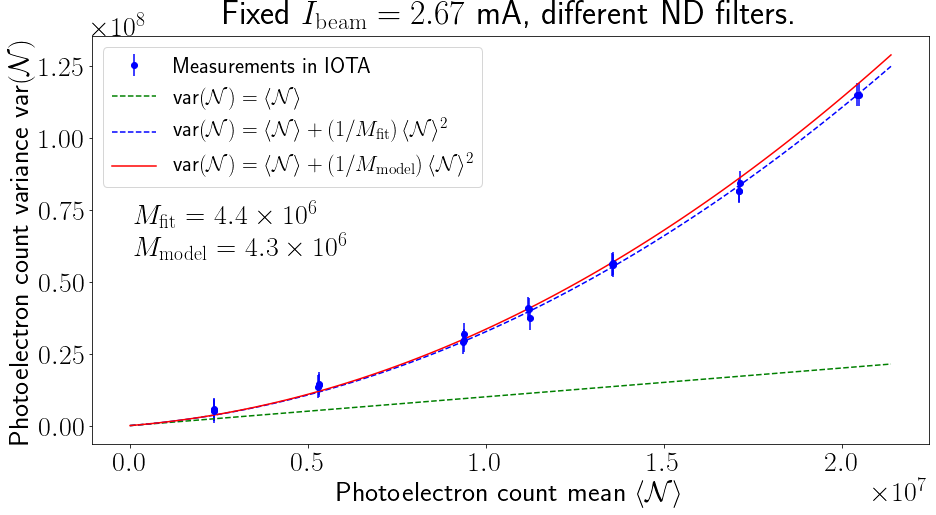

In [59]:
error_bar = 0.33*5.231532189534264e-09*2*sum_channel_to_photoelectrons**2
from matplotlib import rc
rc("text", usetex=True)
plt.rcParams.update({'font.size': 28,'legend.fontsize':22})
fig, ax = plt.subplots(figsize=(15, 7.5))
ax.errorbar(N,varN,marker='o',linestyle='None',yerr=error_bar,color='b', label = 'Measurements in IOTA')
x_aux = np.linspace(0, ax.get_xlim()[1],100)
ax.plot(x_aux, x_aux,color='green',linestyle='--',label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle$")
ax.plot(x_aux, var_theor(x_aux, Mfit),color='blue', linestyle='--',label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle+\left(1/M_{\mathrm{fit}}\right)\langle\mathcal{N}\rangle^2$")
ax.plot(x_aux, var_theor(x_aux, M),color='red',label = r"var$\left(\mathcal{N}\right)=\langle\mathcal{N}\rangle+\left(1/M_{\mathrm{model}}\right)\langle\mathcal{N}\rangle^2$")
ax.legend()
handles, labels = plt.gca().get_legend_handles_labels()
order = [3,0,1,2]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.set_title("Fixed $I_{\mathrm{beam}} = 2.67$ mA, different ND filters.")
ax.text(0.05,0.63-0.1,r"$M_{\mathrm{fit}}$"+" = {:s}".format(as_si(Mfit,1)),transform=ax.transAxes)
ax.text(0.05,0.55-0.1,r'$M_{\mathrm{model}}$'+' = {:s}'.format(as_si(M,1)),transform=ax.transAxes)
ax.set_ylabel(r"Photoelectron count variance var$\left(\mathcal{N}\right)$")
ax.set_xlabel(r"Photoelectron count mean $\langle\mathcal{N}\rangle$")
plt.show()